In [6]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "3_classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.model_selection import train_test_split
nd1=np.load('mnist_20211236_total.npz')#이윤재
nd2=np.load('mnist_20201572_1.npz')#구유정
nd3=np.load('mnist_20171372.npz')#김석우
nd4=np.load('mnist_20170565.npz')#김성년
nd6=np.load('H_MNIST_train.npz')
print(nd1['img'].shape, nd1['img'].dtype, nd1['label'].shape, nd1['label'].dtype)
print(nd2['img'].shape, nd2['img'].dtype, nd2['label'].shape, nd2['label'].dtype)
print(nd3['img'].shape, nd3['img'].dtype, nd3['label'].shape, nd3['label'].dtype)
print(nd4['img'].shape, nd4['img'].dtype, nd4['label'].shape, nd4['label'].dtype)
print(nd6['img'].shape, nd6['img'].dtype, nd6['label'].shape, nd6['label'].dtype)

X=np.concatenate((nd1['img'], nd2['img'],nd3['img'],nd4['img'],nd6['img']), axis=0)
y=np.concatenate((nd1['label'], nd2['label'],nd3['label'],nd4['label'],nd6['label']), axis=0)
np.savez_compressed('mnist_total.npz', X=X, y=y)
nd5=np.load('mnist_total.npz')
nd5

(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int32
(1000, 28, 28) float64 (1000,) int32
(26720, 28, 28) float64 (26720,) int64


In [8]:
X=X.reshape(30720,784)
X.shape

(30720, 784)

In [9]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

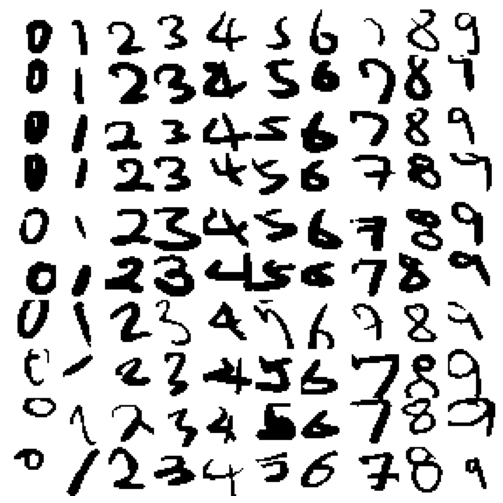

In [11]:
#글씨 확인용
import matplotlib as mpl

plt.figure(figsize=(9,9))
example_images = X[30620:30720]
plot_digits(example_images, images_per_row=10)

In [12]:
#data cleaning : 질 안좋은 애들 다 빼 버렸다

In [12]:
a=X[23110:23120]
b=X[23230:23340]
c=X[23420:23450]
d=X[23520:23720]
e=X[23770:23780]
f=X[23900:23920]
g=X[23970:24110]
h=X[24140:24270]
i=X[24780:28410]
j=X[28460:30720]
a_0=X[:2000]
b_0=X[2100:2070]
c_0=X[2210:2220]
d_0=X[2230:2280]
e_0=X[2410:2800]
f_0=X[2900:6980]
g_0=X[6900:7300]
h_0=X[7400:7500]
i_0=X[7600:7680]
a_1=X[15361:18700]
b_1=X[19120:19290]
c_1=X[19300:19310]
d_1=X[19320:21760]
e_1=X[21780:21790]
f_1=X[21800:21810]
g_1=X[21820:21830]
h_1=X[21840:21850]
i_1=X[21860:21880]
j_1= X[21890:23050]
a_2=X[7680:8200]
b_2=X[8220:8340]
c_2=X[8360:9310]
d_2=X[9520:11920]
e_2=X[11950:12120]
f_2=X[12220:15361]

X_new=np.concatenate((a,b,c,d,e,f,h,g,h,i,j,a_0, b_0,c_0,d_0,e_0,f_0,g_0,h_0,i_0,a_1,b_1,c_1,d_1,e_1,f_1,g_1,h_1,i_1
                     ,j_1,a_2,b_2,c_2,d_2,e_2,f_2))
X_new=X_new.reshape(28260,784)
X_new.shape

(28260, 784)

In [13]:
a_3=y[23110:23120]
b_3=y[23230:23340]
c_3=y[23420:23450]
d_3=y[23520:23720]
e_3=y[23770:23780]
f_3=y[23900:23920]
g_3=y[23970:24110]
h_3=y[24140:24270]
i_3=y[24780:28410]
j_3=y[28460:30720]
a_4=y[:2000]
b_4=y[2100:2070]
c_4=y[2210:2220]
d_4=y[2230:2280]
e_4=y[2410:2800]
f_4=y[2900:6980]
g_4=y[6900:7300]
h_4=y[7400:7500]
i_4=y[7600:7680]
a_5=y[15361:18700]
b_5=y[19120:19290]
c_5=y[19300:19310]
d_5=y[19320:21760]
e_5=y[21780:21790]
f_5=y[21800:21810]
g_5=y[21820:21830]
h_5=y[21840:21850]
i_5=y[21860:21880]
j_5=y[21890:23050]
a_6=y[7680:8200]
b_6=y[8220:8340]
c_6=y[8360:9310]
d_6=y[9520:11920]
e_6=y[11950:12120]
f_6=y[12220:15361]
y_new=np.concatenate((a_3,b_3,c_3,d_3,e_3,f_3,h_3,g_3,h_3,i_3,j_3,a_4, b_4,c_4,d_4,e_4,f_4,g_4,h_4,i_4,a_5,b_5,c_5,d_5,e_5,f_5,g_5,h_5,i_5
                     ,j_5,a_6,b_6,c_6,d_6,e_6,f_6))
y_new.shape

(28260,)

In [15]:
#original MNIST data 불러오기

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
X_mnist, y_mnist = mnist["data"], mnist["target"] # X, y: pandas DataFrame

In [18]:
y_mnist=y_mnist.astype(np.uint8)

In [19]:
X_final=np.concatenate((X_new, X_mnist), axis=0)
y_final=np.concatenate((y_new , y_mnist), axis=0)

In [20]:
#mnist를 dataframe 에서 array 로 변환(concatate 하더라도 mnist 변수 따로 쓰면 data frame 이므로.)

In [21]:
X_mnist=np.array(X_mnist)


print(X_mnist.shape)
print(type(X_mnist))

y_mnist=np.array(y_mnist)


print(y_mnist.shape)
print(type(y_mnist))

(70000, 784)
<class 'numpy.ndarray'>
(70000,)
<class 'numpy.ndarray'>


In [22]:
#학생 데이터 만 따로 합침 (이미 npz로 저장한걸 합치는 거라 array 형태이다)

In [23]:
print(nd1['img'].shape, nd1['img'].dtype, nd1['label'].shape, nd1['label'].dtype)
print(nd2['img'].shape, nd2['img'].dtype, nd2['label'].shape, nd2['label'].dtype)
print(nd3['img'].shape, nd3['img'].dtype, nd3['label'].shape, nd3['label'].dtype)
print(nd4['img'].shape, nd4['img'].dtype, nd4['label'].shape, nd4['label'].dtype)

X_student=np.concatenate((nd1['img'], nd2['img'],nd3['img'],nd4['img']), axis=0)
y_student=np.concatenate((nd1['label'], nd2['label'],nd3['label'],nd4['label']), axis=0)


(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int32
(1000, 28, 28) float64 (1000,) int32


In [24]:
#400개 추출

In [25]:
X_student=X_student.reshape(4000,784)
type(X_student)
X_s_0=X_student[0:100]
X_s_1=X_student[1000:1100]
X_s_2=X_student[2000:2100]
X_s_3=X_student[3000:3100]

y_s_0=y_student[0:100]
y_s_1=y_student[1000:1100]
y_s_2=y_student[2000:2100]
y_s_3=y_student[3000:3100]

X_student_400=np.concatenate((X_s_0,X_s_1,X_s_2,X_s_3))
y_student_400=np.concatenate((y_s_0,y_s_1,y_s_2,y_s_3))
print(X_student_400.shape)
print(type(X_student_400))

(400, 784)
<class 'numpy.ndarray'>


In [26]:
#handmade data

In [27]:
X_hand=nd6['img']
y_hand=nd6['label']

X_hand=X_hand.reshape(26720, 784)

print(X_hand.shape)
print(type(X_hand))

(26720, 784)
<class 'numpy.ndarray'>


In [28]:
#train : mnist / test : student data 400개

In [45]:
#train : handmade / test : student data 400개
from sklearn.model_selection import train_test_split
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.1, shuffle = True, random_state = 8)

In [46]:
#train : handmade / test : student data 400개
from sklearn.model_selection import train_test_split
X_hand_train, X_hand_test, y_hand_train, y_hand_test = train_test_split(X_hand, y_hand, test_size=0.1, shuffle = True, random_state = 8)

In [47]:
from sklearn.model_selection import train_test_split
X_student_train, X_student_400_test, y_student_train, y_student_400_test = train_test_split(X_student, y_student, test_size=0.1, shuffle = True, random_state = 8)

In [55]:
from sklearn.model_selection import train_test_split
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.1, shuffle = True, random_state = 8)

original로 train

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
rnf_clf = RandomForestClassifier()
rnf_clf.fit(X_mnist_train, y_mnist_train)

print("mnist/mnist ",rnf_clf.score(X_mnist_test, y_mnist_test))
print("mnist/hand ",rnf_clf.score(X_hand_test,y_hand_test))
print("mnist/student400 ",rnf_clf.score(X_student_400_test,y_student_400_test))

mnist/mnist  0.9701428571428572
mnist/hand  0.11452095808383234
mnist/student400  0.095


final로 train

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rnf_clf = RandomForestClassifier()
rnf_clf.fit(X_final_train, y_final_train)

print("mnist/mnist ",rnf_clf.score(X_mnist_test, y_mnist_test))
print("mnist/hand ",rnf_clf.score(X_hand_test,y_hand_test))
print("mnist/student400 ",rnf_clf.score(X_student_400_test,y_student_400_test))

mnist/mnist  0.9968571428571429
mnist/hand  0.9240269461077845
mnist/student400  0.9125


hand로 train

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
rnf_clf = RandomForestClassifier()
rnf_clf.fit(X_hand_train, y_hand_train)

print("hand/student400 ",rnf_clf.score(X_student_400,y_student_400))
print("hand/hand ",rnf_clf.score(X_hand_test,y_hand_test))
print("hand/student400 ",rnf_clf.score(X_student_400_test,y_student_400_test))

hand/student400  0.9325
hand/hand  0.6601796407185628
hand/student400  0.845
